Import necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Import Dataset

In [2]:
raw_data = pd.read_csv("Titanic-Dataset.csv",
                       delimiter = ",")

In [3]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Calculate Overall Survival

In [5]:
raw_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
np.unique(raw_data['Survived'])

array([0, 1], dtype=int64)

In [7]:
count = 0
for i in range(0,890,1):
    if (raw_data['Survived'][i] == 1):
        count = count + 1
    

In [8]:
count

342

Visualize Demographic Variable

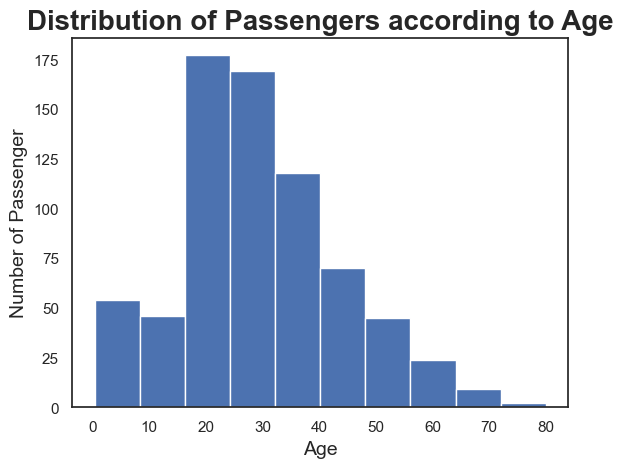

In [9]:
sns.set_style("white")
plt.hist(raw_data['Age'],
         bins = 10)
plt.title("Distribution of Passengers according to Age",
          fontsize = 20,
          fontweight = "bold")
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Number of Passenger", fontsize = 14)
plt.show()
        

Handling Missing Data

In [10]:
df = raw_data.copy()

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [13]:
df = df.drop(['Cabin'], axis = 1)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
pd.unique(df['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df['Embarked'].fillna(method = 'ffill', inplace = True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Replacing Value 

In [20]:
df["Survived"] = df["Survived"].replace( 1 , "Yes")

In [21]:
df["Survived"] = df["Survived"].replace( 0 , "No")

Summary of Age 

In [22]:
df["Age"].mean()

29.69911764705882

median

In [23]:
sort_age = np.sort(df["Age"])

In [24]:
sort_age

array([ 0.42      ,  0.67      ,  0.75      ,  0.75      ,  0.83      ,
        0.83      ,  0.92      ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
        4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
        5.        ,  5.        ,  5.        ,  5.        ,  6.        ,
        6.        ,  6.        ,  7.        ,  7.        ,  7.        ,
        8.        ,  8.        ,  8.        ,  8.        ,  9.        ,
        9.        ,  9.        ,  9.        ,  9.        ,  9.        ,
        9.        ,  9.        , 10.        , 10.        , 11.        ,
       11.        , 11.        , 11.        , 12.        , 13.  

In [25]:
n = sort_age.size
n

891

In [26]:
middle = n//2

In [27]:
middle

445

In [28]:
Median = (sort_age[middle]+sort_age[middle-1])/2
Median

29.69911764705882

In [29]:
df["Age"].mode()

0    29.699118
Name: Age, dtype: float64

Removing Duplicates

In [30]:
df = df.drop_duplicates()

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [32]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Storing the Dataset

In [33]:
df.to_csv("Titanic-Data-Preprocessed.csv", index = False)

In [34]:
df.to_excel("Titanic-Data-Preprocessed.xlsx", index = False)